In [1]:
import MySQLdb as mysql
import matplotlib.pyplot as plt
import numpy as np
import csv

In [71]:
db = mysql.connect(host='128.61.35.111', user='emade', passwd='emade', db='emade_titanic')
c = db.cursor()


KeyboardInterrupt: 

In [70]:
for i in range(0, 16):
    c.execute("SELECT `FullDataSet False Positives`, `FullDataSet False Negatives`, `FullDataSet Num Elements` FROM individuals where hash in (select hash from paretofront where generation="+str(i)+" order by id ASC)")
    individuals = c.fetchall()

    false_positives = sorted([ind[0] for ind in individuals if ind[0] is not None], reverse=True)
    false_negatives = sorted([ind[1] for ind in individuals if ind[1] is not None], reverse=False)
    num_elements = [ind[2] for ind in individuals if ind[0] is not None]

    '''Print dominated population for debugging'''
    # for ind in pop:
    #     print(ind.fitness)

    plt.scatter(false_positives, false_negatives, color='r')
    plt.plot(false_positives, false_negatives, color='r', drawstyle='steps-post')
    plt.xlabel("False Positives")
    plt.ylabel("False Negatives")
    plt.title("Pareto Front")
    plt.show()

    f1 = np.array(false_positives)
    f2 = np.array(false_negatives)

    """Calculate area under curve with least squares method"""
    print("Area Under Curve: %s" % (np.sum(np.abs(np.diff(f1))*f2[:-1])))

NameError: name 'c' is not defined

In [76]:
individuals = []
with open("pareto_combined.csv") as pareto_file:
    reader = csv.reader(pareto_file)
    next(reader, None) #skip the header
    curr = []
    last = 0
    for row in reader:
        index = int(float(row[1]))
        if index == last:
            curr.append((row[2], row[3]))
        else:
            last = index
            individuals.append(curr)
            curr = [(row[2], row[3])]


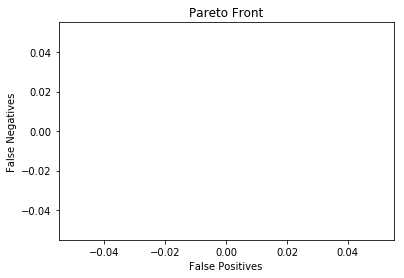

Area Under Curve: 0.0


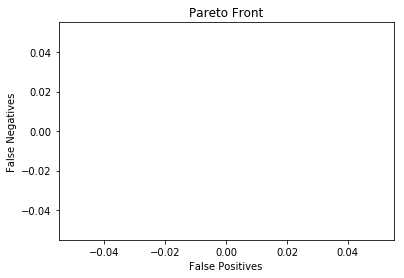

Area Under Curve: 0.0


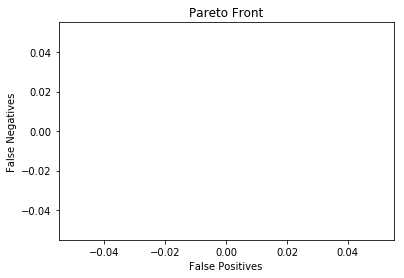

Area Under Curve: 0.0


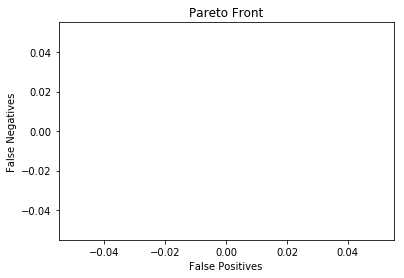

Area Under Curve: 0.0


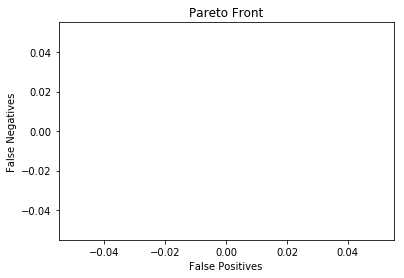

Area Under Curve: 0.0


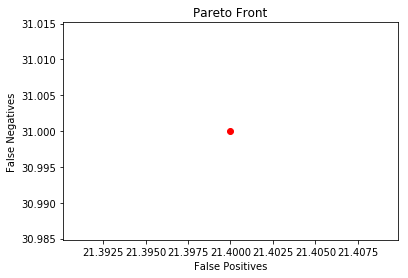

Area Under Curve: 0.0


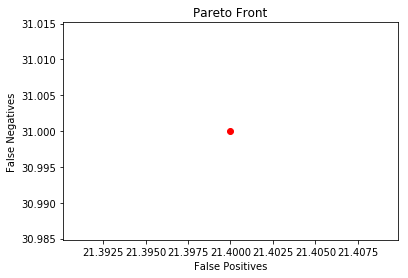

Area Under Curve: 0.0


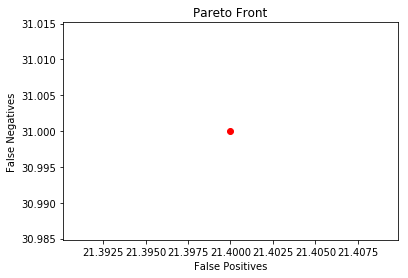

Area Under Curve: 0.0


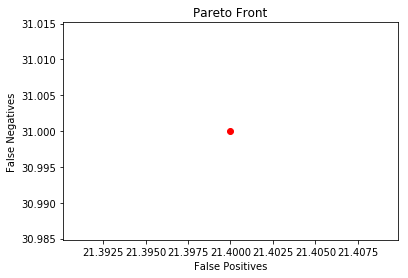

Area Under Curve: 0.0


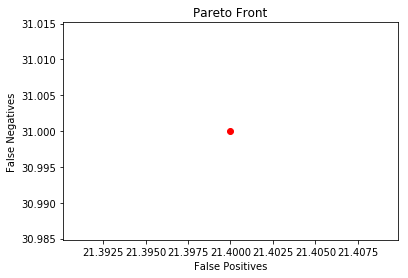

Area Under Curve: 0.0


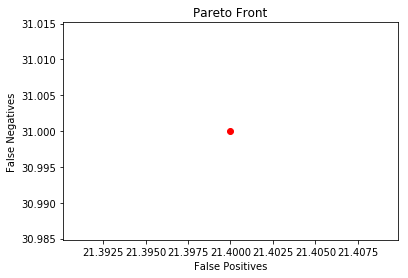

Area Under Curve: 0.0


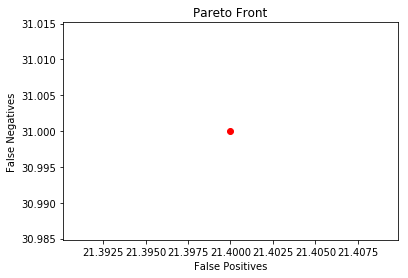

Area Under Curve: 0.0


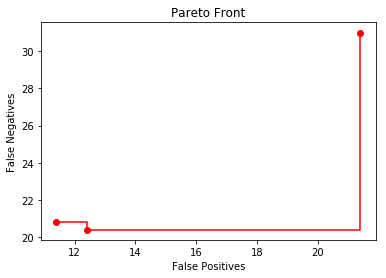

Area Under Curve: 204.39999999999995


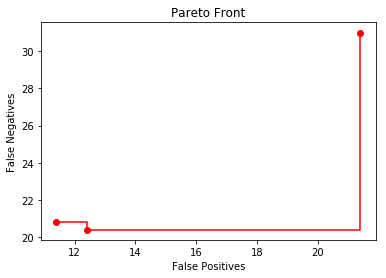

Area Under Curve: 204.39999999999995


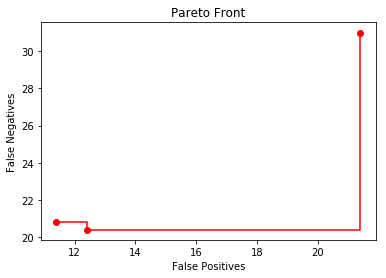

Area Under Curve: 204.39999999999995


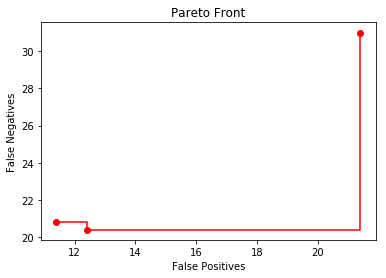

Area Under Curve: 204.39999999999995


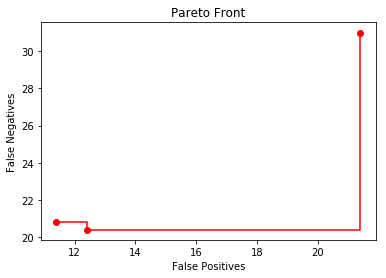

Area Under Curve: 204.39999999999995


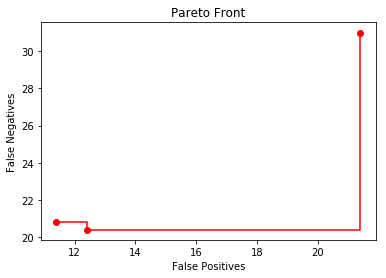

Area Under Curve: 204.39999999999995


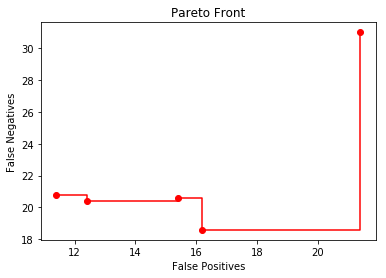

Area Under Curve: 195.2


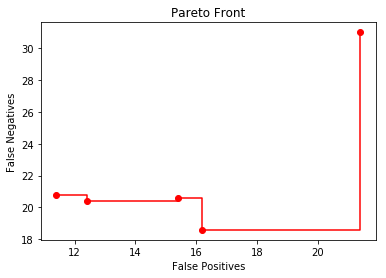

Area Under Curve: 195.2


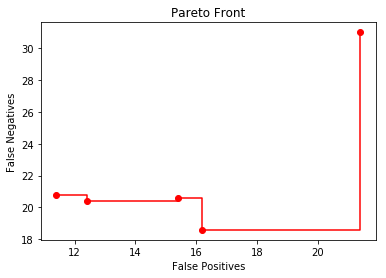

Area Under Curve: 195.2


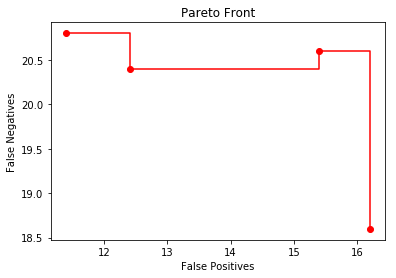

Area Under Curve: 98.47999999999998


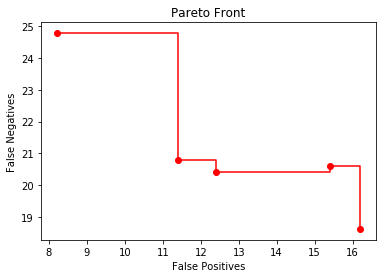

Area Under Curve: 177.84000000000006


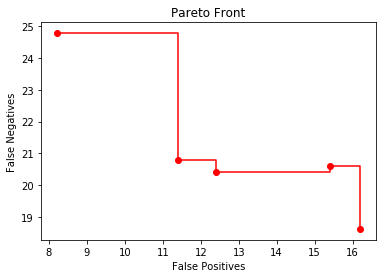

Area Under Curve: 177.84000000000006


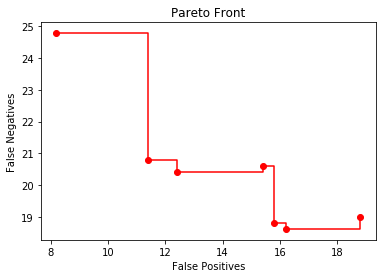

Area Under Curve: 225.48000000000008


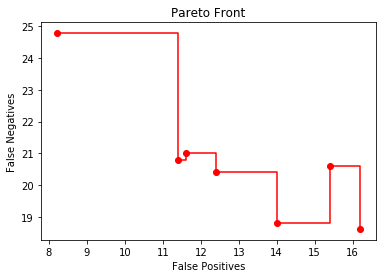

Area Under Curve: 175.76000000000008


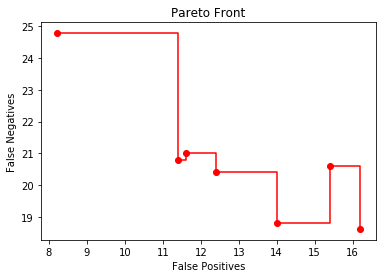

Area Under Curve: 175.76000000000008


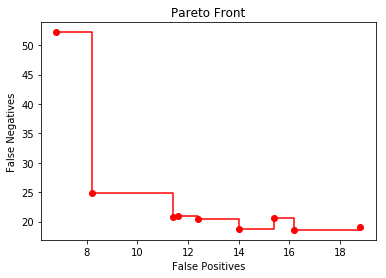

Area Under Curve: 297.19999999999993


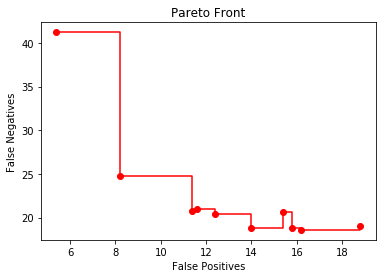

Area Under Curve: 338.76


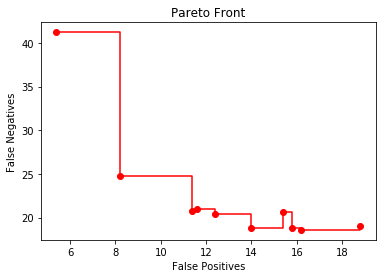

Area Under Curve: 338.76


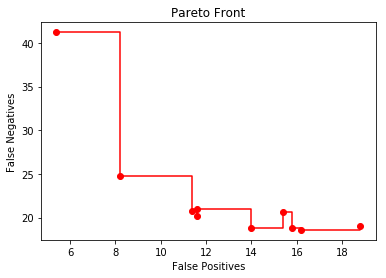

Area Under Curve: 339.71999999999997


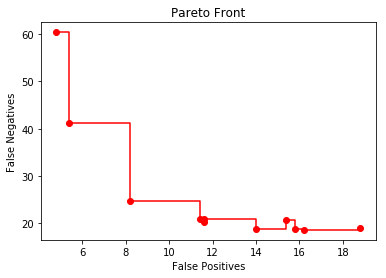

Area Under Curve: 375.96


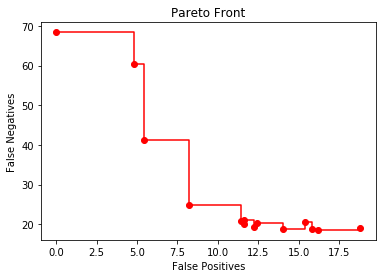

Area Under Curve: 703.0000000000001


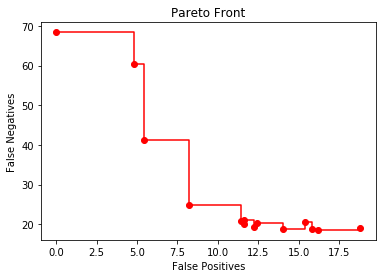

Area Under Curve: 703.0000000000001


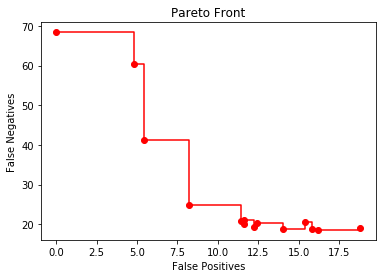

Area Under Curve: 703.0000000000001


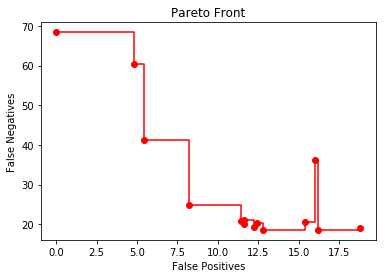

Area Under Curve: 704.4000000000001


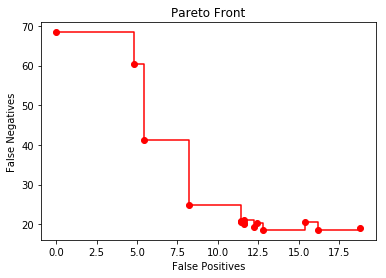

Area Under Curve: 701.2800000000001


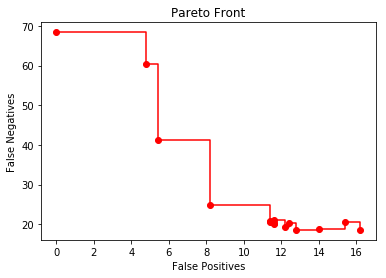

Area Under Curve: 653.2


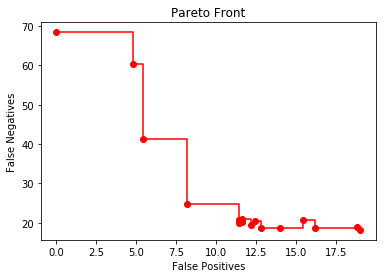

Area Under Curve: 705.36


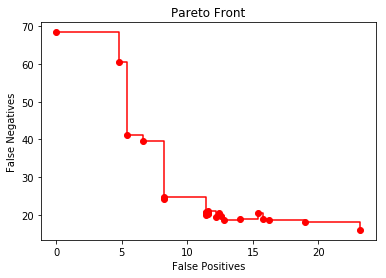

Area Under Curve: 778.3200000000002


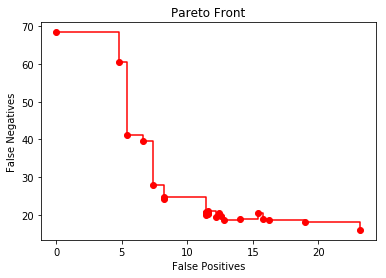

Area Under Curve: 768.8800000000001


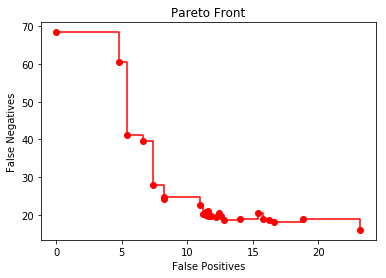

Area Under Curve: 769.6000000000001


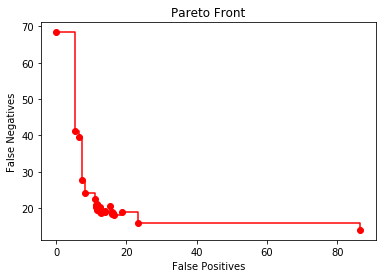

Area Under Curve: 1788.4399999999998


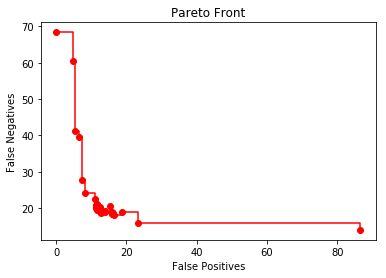

Area Under Curve: 1783.6399999999996


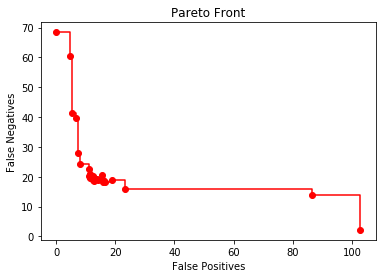

Area Under Curve: 2009.4799999999998


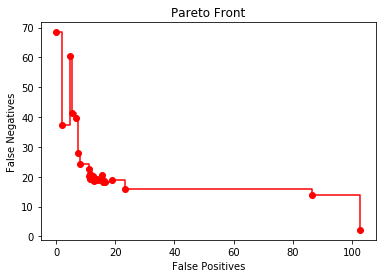

Area Under Curve: 1922.12


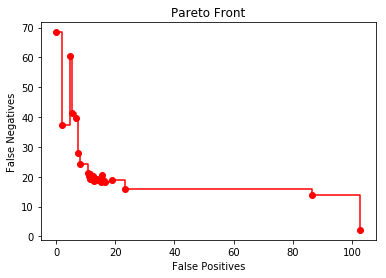

Area Under Curve: 1921.2799999999997


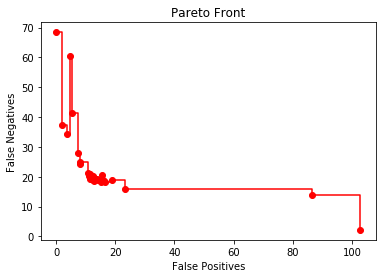

Area Under Curve: 1920.0399999999997


In [82]:
aucs = []
for generation in individuals:
    false_positives = [float(ind[0]) for ind in generation if ind[0] is not 'inf']
    false_negatives = [float(ind[1]) for ind in generation if ind[1] is not 'inf']

    '''Print dominated population for debugging'''
    # for ind in pop:
    #     print(ind.fitness)

    plt.scatter(false_positives, false_negatives, color='r')
    plt.plot(false_positives, false_negatives, color='r', drawstyle='steps-post')
    plt.xlabel("False Positives")
    plt.ylabel("False Negatives")
    plt.title("Pareto Front")
    plt.show()

    f1 = np.array(false_positives)
    f2 = np.array(false_negatives)

    """Calculate area under curve with least squares method"""
    auc = np.sum(np.abs(np.diff(f1))*f2[:-1])
    aucs.append(auc)
    print("Area Under Curve: %s" % (auc))

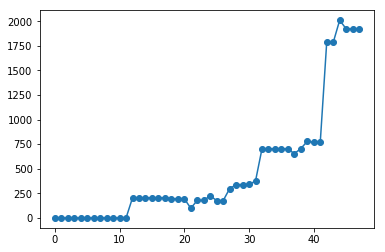

In [83]:
plt.scatter(np.arange(len(aucs)), aucs)
plt.plot(np.arange(len(aucs)), aucs)
plt.show()